In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
%load_ext autoreload
%autoreload 2
import pandas as pd
#import torch
#import torch.nn as nn
#from torch.autograd import Variable
import tensorflow as tf
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from cooc import *
from pickle_vocab import *
from preprocessing_final import pre_process
from helpers import *

### Load data

In [3]:
full_train=load_data()
full_train.sample(5)

,data,target
88402,really big hugs n thankful to <user> for accom...,:)
12780,<user> not the first time i've been told that ...,:)
167945,<user> i missed #askjord as i was in school an...,:(
191250,"scuba max 1.5 mm armara leather palm glove , l...",:(
85097,<user> hahahahahahaha i love this ! ive done i...,:)


### Data pre-processing

In [4]:
full_train.data=pre_process(full_train.data)
full_train.sample(15)

,data,target
130358,samsung series 7 xe700t1a - a01us 11 6- inch s...,:(
103565,negative miss mallof america already #fourfloo...,:(
78455,all kids gonna testing,:)
23236,think just got hungry hmm to eat am gonna make...,:)
198926,listening the positive thrill - wiz khalifa r...,:(
179980,aw man thunderstorms !,:(
111705,sister yelled me cuz my brother,:(
63977,kony box set is positive ready tommorow ! xo,:)
73086,drop thing to floor,:)
153124,reminiscing slavine - say will never go,:(


### Data exploration

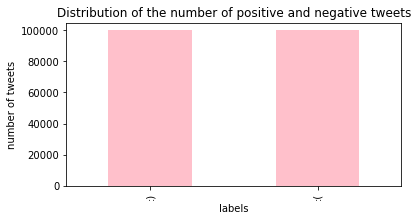

In [5]:
full_train['target'].value_counts().plot.bar(color = 'pink', figsize = (6, 3))
plt.title("Distribution of the number of positive and negative tweets")
plt.ylabel("number of tweets")
plt.xlabel("labels")
plt.show()

The number of tweets per label (positive or negative) is the same. 
Let's visualize basic statistics:

In [6]:
full_train.groupby('target').describe()

data                                                                
         count unique                                                top  freq
target                                                                        
:(      100000  90925                       just wrote ( tell what think   335
:)      100000  89892  positive love  positive fans ! all  positive b...  1556

As already stated above, there is the same number of positive and negative tweets (100'000). In both sets, we have some duplicated tweets as the number of unique tweets for **:(** and for **:)** labels is inferior to 100'000 and it seems that there are more duplicates for the **:)** label. Moreover, the two tweets (one per label) that are the most frequent, have frequency of 335 for **:(** and 1536 for **:)**.  

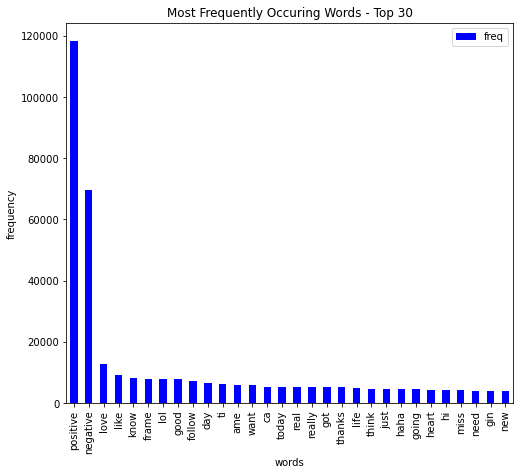

In [7]:
##Let's have a look at the words
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(full_train.data)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(8, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

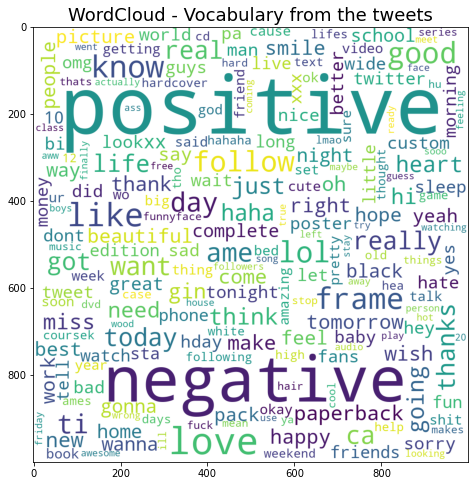

In [8]:
## wordcloud visualization

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from the tweets", fontsize = 18)
plt.show()

The most frequent words, being 'positive' and 'negative' because of the emphasize function (in pre_process), we remove them to check which are the 'real' most frequent words.

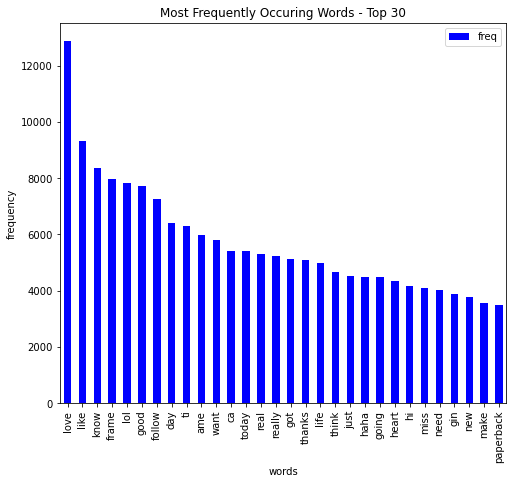

In [9]:
## remove 'positive' and 'negative'

df_visualization=full_train['data'].replace(['positive', 'negative'], '',regex=True)
words = cv.fit_transform(df_visualization)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(8, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

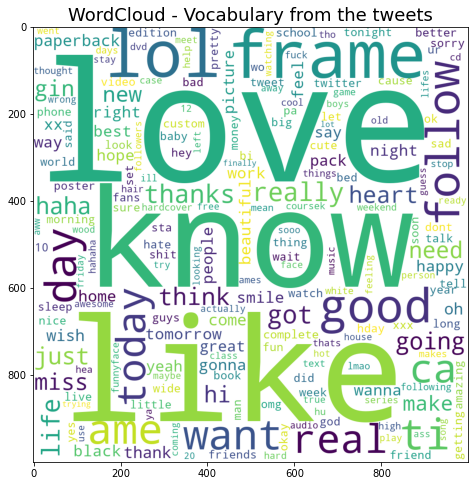

In [10]:
## wordcloud visualization
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from the tweets", fontsize = 18)
plt.show()

From this second visualization, we can see that the most frequent words are:
'love', 'lol', 'frame', 'like', 'know'...

#### Split the data

We split the data to train our models: 
- training data corresponds to 75% of the full dataset (full_train) 
- test data corresponds to 25% of the full dataset

In [11]:
train , test=train_test_split(full_train)
train.reset_index(inplace=True)
test.reset_index(inplace=True)

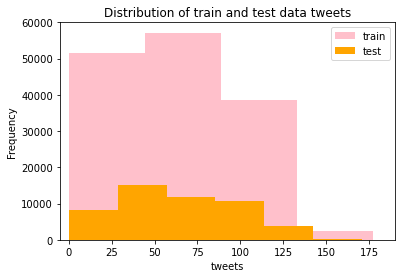

In [12]:
## visualization of the train and test data proportions
length_train = train['data'].str.len().plot.hist( color = 'pink', figsize = (6, 4), label="train")
length_test = test['data'].str.len().plot.hist(test, color = 'orange', figsize = (6, 4), label="test")
plt.legend(loc='upper right')
plt.xlabel("tweets")
plt.title("Distribution of train and test data tweets")
plt.xlim([-5,190])
plt.show()

As expected, knowing the percentage used to split the data, the frequencies for tweets in the training dataset are way higher than for the tweets in the test dataset.

## Embedding matrix generated with glove_template 

By the use of the following command, we created the embedding matrix containing in 'embeddings.npy':
- build_vocab.sh
- cut_vocab.sh
- python3 pickle_vocab.py
- python3 cooc.py
- glove_solution.py

In [13]:
#loading the embeddings
embedding = np.load('embeddings.npy')
embedding

array([[-0.0624184 ,  0.25809285,  0.46808102, ...,  0.11220994,
         0.0700915 , -0.1713295 ],
       [-0.07357667,  0.358285  ,  0.59603286, ...,  0.15345718,
         0.10983199, -0.20984782],
       [-0.10628336,  0.36417176,  0.64368407, ...,  0.18653262,
         0.13535086, -0.27321384],
       ...,
       [-0.58047637,  1.46100843,  0.17323654, ..., -0.56783296,
        -0.51694255,  1.11326787],
       [-0.00829074,  0.57151783,  0.18670145, ..., -0.93484134,
         1.09205771, -0.15699077],
       [ 0.42419782, -1.11966326,  0.47478432, ...,  0.22589967,
         0.47767267,  0.9262853 ]])

In [14]:
#Associate embedding with vocab words: 
vocab = pickle.load(open('vocab.pkl', "rb")) #this file was generated by executing vocab.sh
word_embedding = {}
for key in vocab.keys():
    word_embedding[key] = embedding[vocab.get(key)] #keys in this dict are not encoded 

In [15]:
word_embedding_ = pd.DataFrame(word_embedding).T
word_embedding_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
<user>,-0.062418,0.258093,0.468081,0.154716,-0.061953,0.193585,0.136590,-0.192899,-0.609380,0.241456,0.158564,-0.227923,-0.046408,-0.646507,0.315380,-0.049398,-0.240476,0.112210,0.070092,-0.171329
!,-0.073577,0.358285,0.596033,0.175187,-0.069925,0.236130,0.136245,-0.234488,-0.806842,0.314820,0.202925,-0.223820,-0.069648,-0.775744,0.375333,-0.065762,-0.309307,0.153457,0.109832,-0.209848
i,-0.106283,0.364172,0.643684,0.176967,-0.061982,0.229572,0.156235,-0.273741,-0.897889,0.354699,0.212583,-0.250565,-0.061706,-0.897491,0.412428,-0.092737,-0.316371,0.186533,0.135351,-0.273214
the,-0.011653,0.236626,0.397775,0.095512,-0.049535,0.130265,0.082664,-0.139311,-0.531931,0.220629,0.154458,-0.131252,-0.010530,-0.552534,0.284719,-0.055062,-0.190905,0.062281,0.014405,-0.137945
.,-0.043415,0.295871,0.463649,0.127227,-0.064946,0.173385,0.113648,-0.171314,-0.683133,0.278551,0.138375,-0.178842,-0.049468,-0.694669,0.281236,-0.057531,-0.216907,0.148973,0.070254,-0.192909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#24,0.676883,-0.525740,0.149175,1.049515,-0.280609,-0.281095,-1.480423,-0.186505,0.294011,-0.796667,-1.219514,-0.429095,-1.004261,-3.334868,-0.354213,0.189744,2.155648,1.880045,0.487877,-1.237780
#20,-0.189910,1.070597,0.667216,-1.508027,-1.455436,0.083644,0.005324,-0.110085,-0.960570,0.231336,0.507875,-0.665834,1.394681,0.279417,0.428906,-1.401402,1.406221,0.615580,-0.523434,-0.295795
#1dsongconcept,-0.580476,1.461008,0.173237,0.947708,0.842188,-0.838403,-0.049418,0.771138,-0.047611,0.302175,0.954201,-0.613023,0.697137,-1.352996,1.225485,1.071079,0.579892,-0.567833,-0.516943,1.113268
#18,-0.008291,0.571518,0.186701,0.354076,-1.276377,0.722468,-0.026685,-0.014969,-0.085440,-0.001163,0.347189,-0.172777,2.190954,1.834576,1.039657,-1.767594,-0.542180,-0.934841,1.092058,-0.156991


In [16]:
## takes the average for each word of train dataframe thanks to the embedding matrix with the vocabulary list
avg_word_vectors = average_word_vectors(train.data ,word_embedding_)
avg_word_vectors_df = pd.DataFrame(avg_word_vectors)
avg_word_vectors_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.219223,0.300360,0.366009,0.257105,-0.203032,0.232179,0.105581,-0.186583,-0.863297,0.229340,0.241371,-0.294307,0.022820,-0.737758,0.366141,-0.217516,-0.342085,0.183552,0.144867,-0.268923
1,-0.503500,0.533911,0.219390,0.082591,-0.421399,-0.012895,-0.058798,-0.037506,-0.659270,-0.228646,-0.029451,-0.095802,0.249837,-0.290998,0.258479,-0.305985,-0.627588,0.307315,-0.203155,-0.121082
2,-0.115643,-0.061576,0.336519,0.309340,-0.447621,-0.244957,-0.693042,0.054274,-0.123690,0.036854,0.566820,-0.971970,0.304141,-0.739652,-0.404894,-0.273451,0.154833,-0.493470,-0.910320,-0.488617
3,0.235251,0.217799,0.108087,-0.179902,-0.028535,-0.185037,0.138905,-0.200094,-0.592472,0.372224,0.066597,-0.120212,0.016624,-0.329070,0.353555,-0.004517,-0.202671,0.321611,0.214558,-0.228970
4,-0.212568,0.053345,-0.009114,0.656687,-0.185560,0.455120,0.694371,0.118264,-0.395152,-0.101201,0.404645,-0.074823,-0.121353,-0.534033,0.685349,-0.216885,0.173564,-0.166343,0.413256,-0.256495


In [17]:
#Associate tweets with the average word vectors of each tweet
sample_train_word_vectors= train.join(avg_word_vectors_df)
sample_train_word_vectors.head(5)

,index,data,target,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
0,117200,did saw twitcam either liam wanna negative di...,:(,-0.219223,0.300360,0.366009,0.257105,-0.203032,0.232179,0.105581,...,0.241371,-0.294307,0.022820,-0.737758,0.366141,-0.217516,-0.342085,0.183552,0.144867,-0.268923
1,129944,iluv iss 803blk neoprene sleeve galaxy tab bla...,:(,-0.503500,0.533911,0.219390,0.082591,-0.421399,-0.012895,-0.058798,...,-0.029451,-0.095802,0.249837,-0.290998,0.258479,-0.305985,-0.627588,0.307315,-0.203155,-0.121082
2,10778,ctfuuu ama there honeyyy,:),-0.115643,-0.061576,0.336519,0.309340,-0.447621,-0.244957,-0.693042,...,0.566820,-0.971970,0.304141,-0.739652,-0.404894,-0.273451,0.154833,-0.493470,-0.910320,-0.488617
3,162360,am soldier : jessica lynch story ( hardcover m...,:(,0.235251,0.217799,0.108087,-0.179902,-0.028535,-0.185037,0.138905,...,0.066597,-0.120212,0.016624,-0.329070,0.353555,-0.004517,-0.202671,0.321611,0.214558,-0.228970
4,154617,keyboard appears be negative broken,:(,-0.212568,0.053345,-0.009114,0.656687,-0.185560,0.455120,0.694371,...,0.404645,-0.074823,-0.121353,-0.534033,0.685349,-0.216885,0.173564,-0.166343,0.413256,-0.256495


In [18]:
## we are only interested in the weights to further train the models
X_train = sample_train_word_vectors.drop(columns=["data","target","index"])

In [19]:
## we are only interested in the labels
Y_train = sample_train_word_vectors.target

In [20]:
## let's do the same for the test data
avg_word_vectors_test_df = pd.DataFrame(average_word_vectors(test.data ,word_embedding_))

In [21]:
## same as for the training data
sample_test_word_vectors=test.join(avg_word_vectors_test_df)
X_test = sample_test_word_vectors.drop(columns=["data","target", "index"])
Y_test = sample_test_word_vectors.target

## Training models with glove 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#### Logistic Regression

In [28]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.64036
Validation Accuracy : 0.64136
[[15402  9576]
 [ 8356 16666]]


#### SVM

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_clf_svm = Pipeline([('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, Y_train)
predicted_svm = text_clf_svm.predict(X_test)
print("accuracy of the SVM:", np.mean(predicted_svm == Y_test))

accuracy of the SVM: 0.63918


In [49]:
y_prediction_svm=text_clf_svm.predict(X_real_test)

In [54]:
#convert smiley to +1, -1
Y_train_tr=transform_smiley(Y_train)
Y_test_tr= transform_smiley(Y_test)

#### Random Forest

In [55]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train_tr)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train_tr))
print("Validation Accuracy :", model.score(X_test, Y_test_tr))

Training Accuracy : 0.9961466666666666
Validation Accuracy : 0.68012


In [63]:
y_pred_random_forest=model.predict(X_real_test)
y_pred_random_forest

array([-1,  1, -1, ..., -1,  1, -1])

### Neuron Networks

**with keras**

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import PReLU
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import Constant
from keras.constraints import maxnorm
from keras.backend import clear_session

# works on arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [38]:
#cleaning to avoid stucked information
clear_session()

In [41]:
#Neural network predict either 0 or 1 not -1/1 so just changing all -1 values to 0.
Y_train_nn=Y_train_tr

for i in range(len(Y_train_tr)):
    if (Y_train_tr[i]==-1):
        Y_train_nn[i]=0

In [42]:
Y_train_nn=np.array(Y_train_nn)

In [43]:
np.random.seed(13)

model_d2v_02 = Sequential()
model_d2v_02.add(Dense(500, activation='relu', input_dim=20, kernel_constraint=maxnorm(3)))
model_d2v_02.add(Dense(500, activation='relu'))
model_d2v_02.add(Dense(1, activation='sigmoid'))

model_d2v_02.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_d2v_02.fit(X_train, Y_train_nn,
                 validation_split=0.1, shuffle=True,
                 epochs=20, batch_size=100, verbose=1)

Epoch 1/20
1350/1350 [==============================] - 12s 8ms/step - loss: 0.6241 - accuracy: 0.6545 - val_loss: 0.6111 - val_accuracy: 0.6655
Epoch 2/20
1350/1350 [==============================] - 11s 8ms/step - loss: 0.6045 - accuracy: 0.6730 - val_loss: 0.6022 - val_accuracy: 0.6739
Epoch 3/20
1350/1350 [==============================] - 11s 8ms/step - loss: 0.5965 - accuracy: 0.6783 - val_loss: 0.6021 - val_accuracy: 0.6704
Epoch 4/20
1350/1350 [==============================] - 11s 8ms/step - loss: 0.5912 - accuracy: 0.6825 - val_loss: 0.5984 - val_accuracy: 0.6769
Epoch 5/20
1350/1350 [==============================] - 10s 8ms/step - loss: 0.5856 - accuracy: 0.6862 - val_loss: 0.5980 - val_accuracy: 0.6793
Epoch 6/20
1350/1350 [==============================] - 10s 8ms/step - loss: 0.5802 - accuracy: 0.6884 - val_loss: 0.5974 - val_accuracy: 0.6783
Epoch 7/20
1350/1350 [==============================] - 11s 8ms/step - loss: 0.5748 - accuracy: 0.6943 - val_loss: 0.5950 - val_ac

In [44]:
predictions_nn=model_d2v_02.predict(X_real_test)

In [47]:
#converting back 0 predictions to smileys
real_pred=[]

for i in range(len(predictions_nn)):
    if (predictions_nn[i]<0.5):
        real_pred.append(':(')
    if (predictions_nn[i]>=0.5):
        real_pred.append(':)')


In [91]:
print("accuracy is:",np.mean(real_pred==Y_test))

0.68258

## Create submission

Submissions on AlCrowd are made with the test dataset provided.

In [56]:
with open('twitter-datasets/test_data.txt') as f:
    real_test = f.readlines()
real_test={'data':real_test}
real_test=pd.DataFrame(real_test)

**test data pre-processing:**

In [57]:
real_test.data=pre_process(real_test.data)
real_test.sample(15)

,data
9373,9374 hehe thanks hun
5665,5666 want first ampression nvm tell positive ...
5146,5147 positive love people texting first it sh...
7032,7033 jelly cause positive fav never at rih le...
1244,1245 every negative thug needs lady
8527,8528 positive good news negative bad news se...
9238,9239 waiting u the gym will a positive good w...
7263,7264 positive good morning everyone monday
9068,9069 a friend calls you not talked forever
4641,4642 so negative cold everywhere


In [58]:
# creation of the weight matrix
avg_real_test_df = pd.DataFrame(average_word_vectors(real_test.data ,word_embedding_))
sample_real_test_word_vectors= real_test.join(avg_real_test_df)
X_real_test = sample_real_test_word_vectors.drop(columns=["data"])

In [59]:
import re
ids=[]   
for i in range (len(real_test)):
    text=real_test.data[i]
    found=re.findall('\d+', text )
    ids.append(found[0])


In [64]:
OUTPUT_PATH = 'sample_submission.csv' 
create_csv_submission(ids,y_pred_random_forest, OUTPUT_PATH)